In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [8]:
df['label'] = (df['label'] == 'spam').astype(int)

In [9]:
df.head(5)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#checking for duplicates
df.duplicated().sum()

403

In [11]:
#removing duplicates
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

Data Analysis

In [14]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

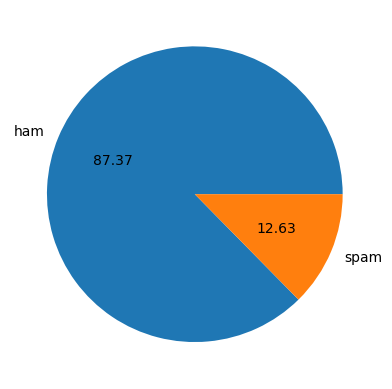

In [15]:
#autopct is a string format or a function used to label the wedges with their numeric value with 2 decimal places.
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
import nltk

In [17]:
#The punkt package is a powerful tool in NLTK(Natuarl language toolkit) for splitting text into sentences and words. 
#By leveraging statistical models, it provides robust and language-independent tokenization. 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MOKSHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters'] = df['text'].apply(len)

In [19]:
#The apply method is used to apply a function to each element in the column.
#x is an argument, which represents each element in the column.
#The nltk.word_tokenize function splits the text into individual words (tokens).
#The len function is used to calculate the length of the list of word tokens
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
#ham
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()
#count: The number of non-null entries in each column.meaning there are 3531 rows where label is 0.
#max: The maximum value in each column.

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
#spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

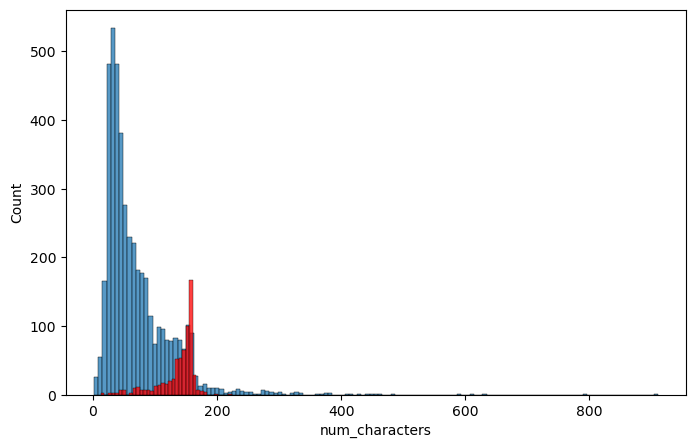

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['label'] == 0]['num_characters'])  #ham
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')  #spam

<AxesSubplot:xlabel='num_words', ylabel='Count'>

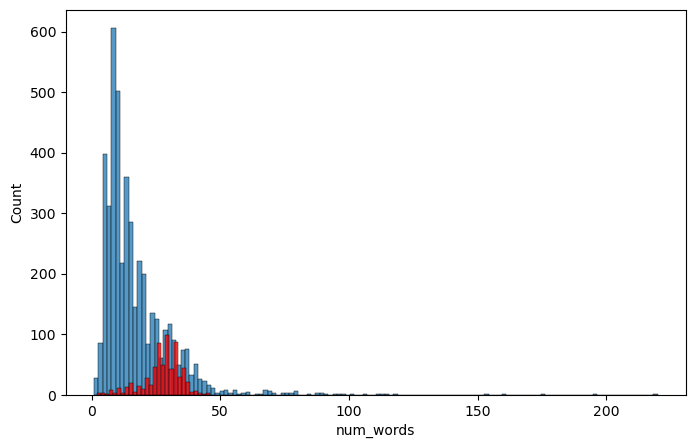

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['label'] == 0]['num_words'])  #ham
sns.histplot(df[df['label'] == 1]['num_words'],color='red')  #spam

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

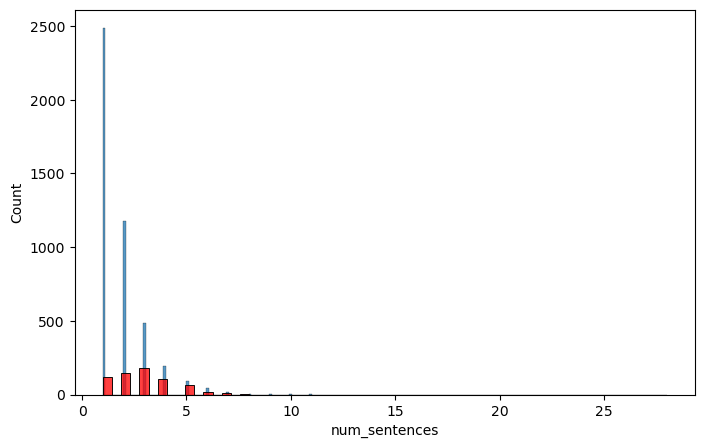

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['label'] == 0]['num_sentences'])  #ham
sns.histplot(df[df['label'] == 1]['num_sentences'],color='red')  #spam

<AxesSubplot:>

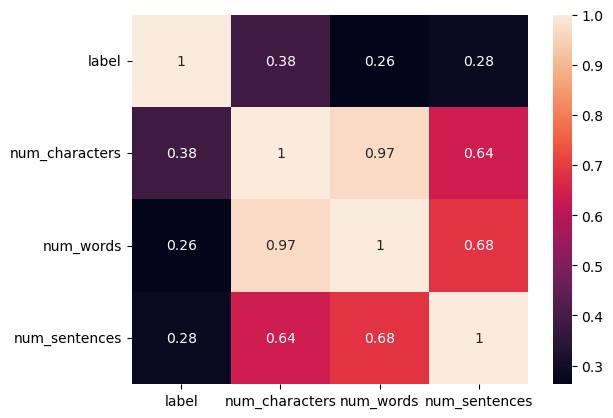

In [27]:
sns.heatmap(df.corr(),annot=True)

Data Preprocessing

In [28]:
def transform_text(text):
    #converting to lowercase
    text = text.lower()
    #Breaks down text into individual words or tokens, which are the basic units for analysis.
    text = nltk.word_tokenize(text)
    #Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    #Removing stop words and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [29]:
df['text'][5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [30]:
#This command downloads the stopwords dataset from the NLTK data repository
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MOKSHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
#After downloading the stopwords dataset, this import statement is used to load the stopwords into your Python environment.
from nltk.corpus import stopwords

In [32]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:
transform_text(df['text'][5])

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)

In [35]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" ")) #spam
#.str.cat(sep=" "):This method concatenates all the strings in the selected column into a single string,with each string separated by a space.

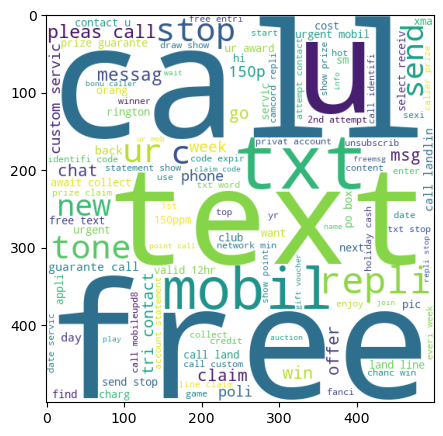

In [39]:
plt.figure(figsize=(5,6))
plt.imshow(spam_wc)

In [40]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" ")) #ham

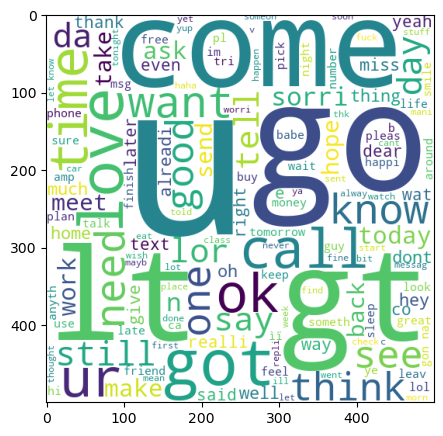

In [41]:
plt.figure(figsize=(5,6))
plt.imshow(ham_wc)

In [42]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

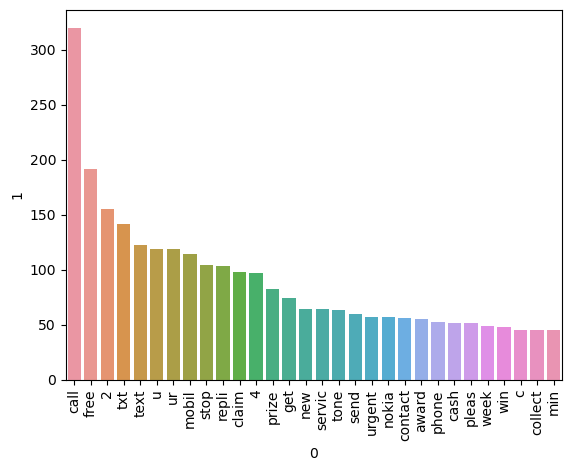

In [43]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

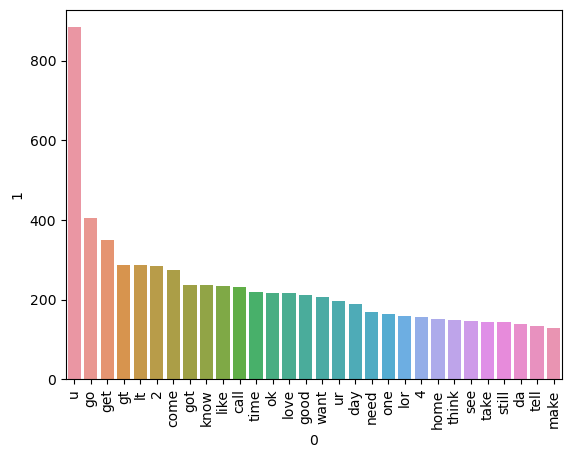

In [45]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Training

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [47]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [48]:
X.shape

(5169, 3000)

In [49]:
Y = df['label'].values

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

Gaussian Naive Bayes

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [54]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(f"accuracy:{accuracy_score(Y_test,y_pred1)}")
print(f"precision:{precision_score(Y_test,y_pred1)}")
print(f"recall:{recall_score(Y_test,y_pred1)}")
print(f"f1-score:{f1_score(Y_test,y_pred1)}")

accuracy:0.8694390715667312
precision:0.5068493150684932
recall:0.8043478260869565
f1-score:0.6218487394957983


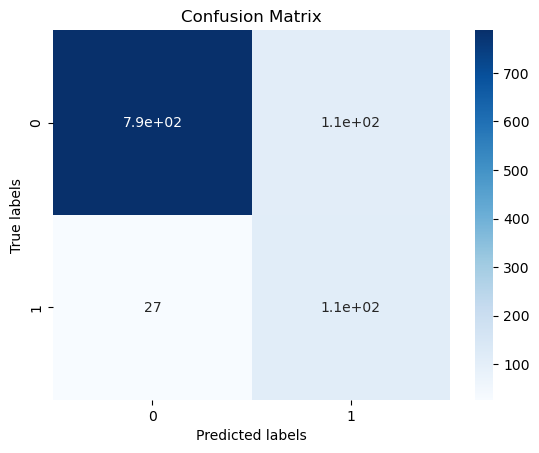

In [55]:
cm = confusion_matrix(Y_test, y_pred1)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Multinomial Naive Bayes

In [56]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(f"accuracy:{accuracy_score(Y_test,y_pred2)}")
print(f"precision:{precision_score(Y_test,y_pred2)}")
print(f"recall:{recall_score(Y_test,y_pred2)}")
print(f"f1-score:{f1_score(Y_test,y_pred2)}")

accuracy:0.9709864603481625
precision:1.0
recall:0.782608695652174
f1-score:0.878048780487805


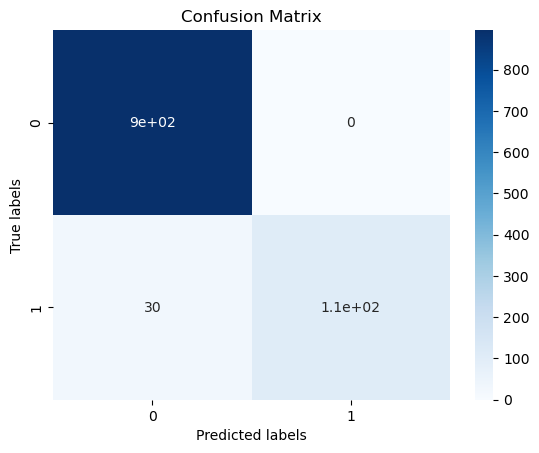

In [57]:
cm = confusion_matrix(Y_test, y_pred2)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lgr = LogisticRegression()

In [60]:
lgr.fit(X_train,Y_train)
y_pred3 = lgr.predict(X_test)
print(f"accuracy:{accuracy_score(Y_test,y_pred3)}")
print(f"precision:{precision_score(Y_test,y_pred3)}")
print(f"recall:{recall_score(Y_test,y_pred3)}")
print(f"f1-score:{f1_score(Y_test,y_pred3)}")

accuracy:0.9564796905222437
precision:0.979381443298969
recall:0.6884057971014492
f1-score:0.8085106382978722


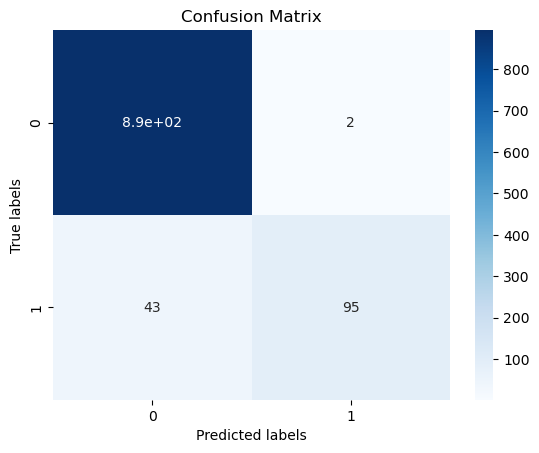

In [61]:
cm = confusion_matrix(Y_test, y_pred3)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Support vector classifier

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC(kernel='sigmoid')

In [64]:
svc.fit(X_train,Y_train)
y_pred4 = svc.predict(X_test)
print(f"accuracy:{accuracy_score(Y_test,y_pred4)}")
print(f"precision:{precision_score(Y_test,y_pred4)}")
print(f"recall:{recall_score(Y_test,y_pred4)}")
print(f"f1-score:{f1_score(Y_test,y_pred4)}")

accuracy:0.9758220502901354
precision:0.9747899159663865
recall:0.8405797101449275
f1-score:0.9027237354085604


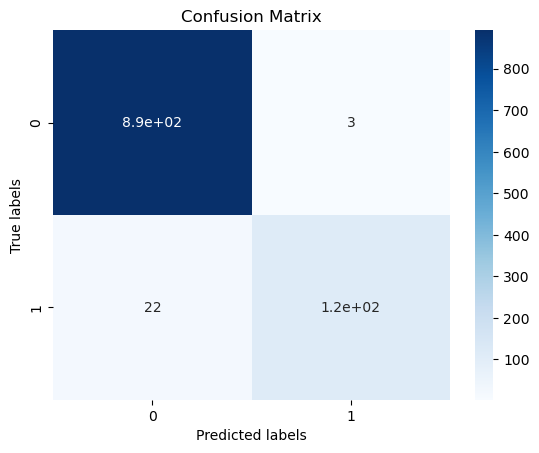

In [65]:
cm = confusion_matrix(Y_test, y_pred4)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

svc is the better classifier

Prediction:

In [66]:
email = input("Enter the mail:")
email = transform_text(email)
input_data_features = tfidf.transform([email]).toarray();
y_pred = svc.predict(input_data_features)
print(y_pred)

if(y_pred==1):
    print("Spam mail")
else:
    print("Ham mail")

Enter the mail:"Your free ringtone is waiting to be collected. Simply text the password \MIX\"" to 85069 to verify. Get Usher and Britney. FML", PO Box 5249," MK17 92H. 450Ppw 16""",
[1]
Spam mail
